Using basic libraries for calculation, data and modeling.

In [1]:
import numpy as np
import pandas as pd

Check current folder, get updated files if available.

In [2]:
!pwd
#!wget -N https://gitlab.com/dzwietering/corona/-/raw/master/zzprogress.csv
!wget -N https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset.xlsx

/home/zwieteri/git/corona
--2020-10-15 15:29:07--  https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset.xlsx
Resolving www.acaps.org (www.acaps.org)... 151.80.35.46
Connecting to www.acaps.org (www.acaps.org)|151.80.35.46|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-10-15 15:29:08 ERROR 404: Not Found.



Read the generated country progress file, read the proper columns as dates.

In [3]:
df_prog = pd.read_csv('zzprogress.csv', parse_dates=[8, 9, 10])
df_prog

iso2                         cname iso3    ccont     popdata  rsquared  \
0     AD                       Andorra  AND   Europe     76177.0  0.955327   
1     AE          United_Arab_Emirates  ARE     Asia   9770526.0  0.994267   
2     AF                   Afghanistan  AFG     Asia  38041757.0  0.994937   
3     AG           Antigua_and_Barbuda  ATG  America     97115.0  0.983465   
4     AI                      Anguilla  AIA  America     14872.0  0.999319   
..   ...                           ...  ...      ...         ...       ...   
176   VG        British_Virgin_Islands  VGB  America     30033.0  0.960652   
177   VI  United_States_Virgin_Islands  VIR  America    104579.0  0.966921   
178   XK                        Kosovo  XKX   Europe   1798506.0  0.994462   
179   ZA                  South_Africa  ZAF   Africa  58558267.0  0.978311   
180   ZM                        Zambia  ZMB   Africa  17861034.0  0.995188   

     progress          final      start       peak      floor       beta  \
0    1.144845     637.141572 2020-03-18 2020-03-31 2020-05-15   6.149978   
1    0.661986   48966.287472 2020-03-22 2020-05-12 2020-09-25  25.832777   
2    0.175031   74902.190286 2020-04-18 2020-06-25 2020-11-27  39.706238   
3    0.990205      23.660322 2020-03-23 2020-04-05 2020-05-02   7.927177   
4    0.619629       2.074973 2020-03-29 2020-04-05 2020-04-22   5.028065   
..        ...            ...        ...        ...        ...        ...   
176  0.730127       8.217750 2020-03-28 2020-04-27 2020-06-20  22.522308   
177  0.783359      48.873759 2020-03-17 2020-04-17 2020-06-19  20.170511   
178  0.934180    1120.462905 2020-03-21 2020-04-18 2020-06-18  16.975078   
179  0.035563  772770.030918 2020-04-05 2020-09-11        NaT  81.831457   
180  1.085406     935.923468 2020-05-11 2020-05-17 2020-05-30   5.663459   

             mu        maxcur  
0     91.156126    439.684610  
1    132.896521   9642.257985  
2    176.920979   9664.442637  
3     95.526352     13.604608  
4     96.353654      1.613909  
..          ...           ...  
176  117.520926      1.848767  
177  107.945431     12.230366  
178  108.853127    330.460600  
179  254.968956  48963.953214  
180  138.281355    680.472542  

[181 rows x 14 columns]

Have a look at the countries with the highest estimated part of the population concurrently infected. Therefore, we divide the maximum current from the estimate by the population data. We use a log scale due to large differences and show countries with values above 1 per thousand.

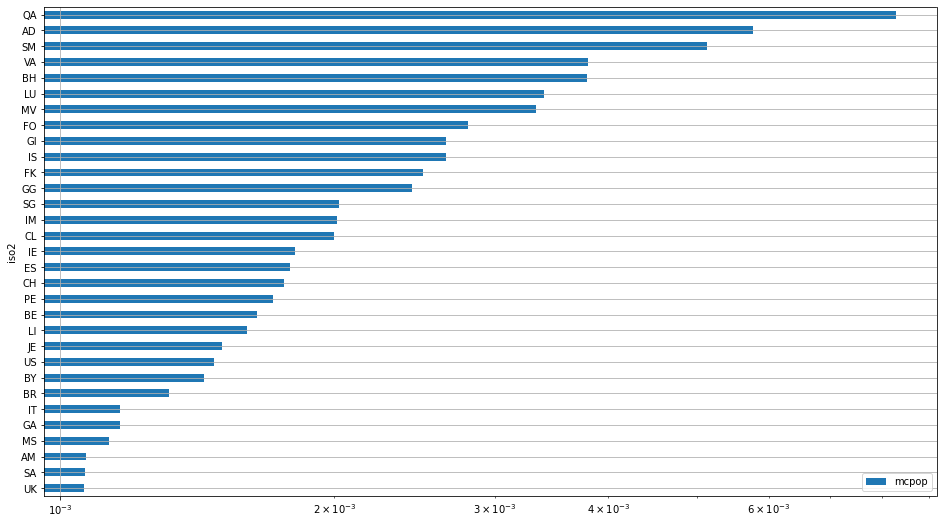

In [4]:
df_prog['mcpop'] = df_prog['maxcur'] / df_prog['popdata']
df_prog[df_prog['mcpop'] > 1/1000].sort_values(by=['mcpop']).plot(
    x='iso2', y='mcpop', kind='barh', logx=True, figsize=(16, 9), grid=True)

The log of infected seems a good initial measure, so we define it as target.

In [5]:
df_prog['target'] = np.log10(df_prog['mcpop'])
df_prog['target'].describe()

count    181.000000
mean      -3.715264
std        0.687358
min       -5.030719
25%       -4.260580
50%       -3.786451
75%       -3.135566
max       -2.082021
Name: target, dtype: float64

For looking at country behavior we try the ACAPS government measures dataset.

In [6]:
df_meas = pd.read_excel('acaps_covid19_government_measures_dataset.xlsx', sheet_name='Dataset', parse_dates=[12, 16])
df_meas

ID  ISO      COUNTRY  REGION ADMIN_LEVEL_NAME  PCODE  \
0          1  AFG  Afghanistan    Asia              NaN    NaN   
1          2  AFG  Afghanistan    Asia            Kabul    NaN   
2          3  AFG  Afghanistan    Asia              NaN    NaN   
3          4  AFG  Afghanistan    Asia              NaN    NaN   
4          5  AFG  Afghanistan    Asia              NaN    NaN   
...      ...  ...          ...     ...              ...    ...   
18689  13722  ZWE     Zimbabwe  Africa              NaN    NaN   
18690  13723  ZWE     Zimbabwe  Africa              NaN    NaN   
18691  13724  ZWE     Zimbabwe  Africa              NaN    NaN   
18692  14734  ZWE     Zimbabwe  Africa              NaN    NaN   
18693  14735  ZWE     Zimbabwe  Africa              NaN    NaN   

                                   LOG_TYPE  \
0      Introduction / extension of measures   
1      Introduction / extension of measures   
2      Introduction / extension of measures   
3      Introduction / extension of measures   
4      Introduction / extension of measures   
...                                     ...   
18689  Introduction / extension of measures   
18690                     Phase-out measure   
18691  Introduction / extension of measures   
18692                     Phase-out measure   
18693                     Phase-out measure   

                                     CATEGORY  \
0                      Public health measures   
1                      Public health measures   
2                      Public health measures   
3      Governance and socio-economic measures   
4                           Social distancing   
...                                       ...   
18689                   Movement restrictions   
18690                       Social distancing   
18691                   Movement restrictions   
18692                       Social distancing   
18693                       Social distancing   

                                                 MEASURE TARGETED_POP_GROUP  \
0      Health screenings in airports and border cross...                NaN   
1                      Isolation and quarantine policies                NaN   
2                                    Awareness campaigns                NaN   
3      Emergency administrative structures activated ...                NaN   
4                                Limit public gatherings                NaN   
...                                                  ...                ...   
18689                        Surveillance and monitoring                NaN   
18690                                    Schools closure                NaN   
18691                        Surveillance and monitoring            checked   
18692          Closure of businesses and public services            checked   
18693          Closure of businesses and public services            checked   

                                                COMMENTS  NON_COMPLIANCE  \
0                                                    NaN             NaN   
1                                                    NaN             NaN   
2                                                    NaN             NaN   
3                                                    NaN             NaN   
4                              Nevruz festival cancelled             NaN   
...                                                  ...             ...   
18689  Everyone transiting through Zimbabwe should ha...  Not available    
18690  the re-opening of schools be moved from the pr...  Not applicable   
18691  Identification/travel documents of returness w...  Not available    
18692  Restaurants now allowed to serve sit-in meals ...  Not applicable   
18693  Safari Operators for local hunting only and Na...  Not applicable   

      DATE_IMPLEMENTED                   SOURCE   SOURCE_TYPE  \
0           2020-02-12       Ministry of Health    Government   
1           2020-02-12       Ministry of Health    Government   
2     

The dataset contains both start and end of measures, so let's see how they are coded.

In [7]:
print(df_meas['LOG_TYPE'].unique())
df_meas = df_meas[(df_meas['LOG_TYPE'] == 'Introduction / extension of measures') & (df_meas['DATE_IMPLEMENTED'] < '20200601')]

['Introduction / extension of measures' 'Phase-out measure']


Both datasets contain the three character ISO country code, so we join on those columns.

In [8]:
df_full = pd.merge(df_prog, df_meas, left_on='iso3', right_on='ISO')
df_full

iso2                 cname iso3   ccont     popdata  rsquared  progress  \
0      AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.994267  0.661986   
1      AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.994267  0.661986   
2      AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.994267  0.661986   
3      AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.994267  0.661986   
4      AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.994267  0.661986   
...   ...                   ...  ...     ...         ...       ...       ...   
9073   ZM                Zambia  ZMB  Africa  17861034.0  0.995188  1.085406   
9074   ZM                Zambia  ZMB  Africa  17861034.0  0.995188  1.085406   
9075   ZM                Zambia  ZMB  Africa  17861034.0  0.995188  1.085406   
9076   ZM                Zambia  ZMB  Africa  17861034.0  0.995188  1.085406   
9077   ZM                Zambia  ZMB  Africa  17861034.0  0.995188  1.085406   

             final      start       peak  ...  \
0     48966.287472 2020-03-22 2020-05-12  ...   
1     48966.287472 2020-03-22 2020-05-12  ...   
2     48966.287472 2020-03-22 2020-05-12  ...   
3     48966.287472 2020-03-22 2020-05-12  ...   
4     48966.287472 2020-03-22 2020-05-12  ...   
...            ...        ...        ...  ...   
9073    935.923468 2020-05-11 2020-05-17  ...   
9074    935.923468 2020-05-11 2020-05-17  ...   
9075    935.923468 2020-05-11 2020-05-17  ...   
9076    935.923468 2020-05-11 2020-05-17  ...   
9077    935.923468 2020-05-11 2020-05-17  ...   

                                                MEASURE  TARGETED_POP_GROUP  \
0                                     Visa restrictions             checked   
1                                     Visa restrictions                 NaN   
2                      International flights suspension             checked   
3     Health screenings in airports and border cross...             checked   
4     Health screenings in airports and border cross...                 NaN   
...                                                 ...                 ...   
9073          Closure of businesses and public services                 NaN   
9074  Emergency administrative structures activated ...                 NaN   
9075             Strengthening the public health system             checked   
9076                                     Border closure             checked   
9077                       Domestic travel restrictions             checked   

                                               COMMENTS  NON_COMPLIANCE  \
0     entry ban for travellers from Iran (no governm...             NaN   
1         suspension of visa issuance starting March 17             NaN   
2     flights to and from Iran and China are suspend...             NaN   
3     passengers arriving from China will undergo he...             NaN   
4          health sreenings for all passengers arriving             NaN   
...                                                 ...             ...   
9073           Zambia suspends parliament indefinitely.             NaN   
9074  Ministries of General Education and Informatio...  Not applicable   
9075  Number of measures are being taken to ensure s...  Not applicable   
9076  Nakonde Boarder to temporarily close tomorrow ...  Not applicable   
9077  There will be a suspension of public road and ...  Not applicable   

      DATE_IMPLEMENTED                       SOURCE   SOURCE_TYPE  \
0           2020-01-02                      Reuters         Media   
1           2020-03-17                          NYT         Media   
2           2020-03-17  Ministry of Foreign Affairs    Government   
3           2020-01-23                 KhaleejTimes         Media   
4           2020-03-08                   US Embassy    Government   
...                ...                          ...           ...   
9073        2020-03-18                          NaN           NaN   
9074        2020-04-13      Ministry of Information  

The first analysis could be how early measures were implemented, so we calculate the difference between the implemented date and our estimated start date in days.

In [9]:
df_full['days'] = (df_full['DATE_IMPLEMENTED'] - df_full['start']).dt.days
df_full['days'].describe()

count    8767.000000
mean       11.987681
std        33.614330
min      -132.000000
25%        -8.000000
50%        11.000000
75%        36.000000
max       118.000000
Name: days, dtype: float64

To reduce this to a source dataset for modeling, we filter on introduction of measures and pivot to columns with the average number of days for categories, indexed by country code.

In [10]:
df_aggr = df_full.pivot_table(index='iso2', columns='CATEGORY', values='days', aggfunc='mean')
df_aggr

CATEGORY  Governance and socio-economic measures  Humanitarian exemption  \
iso2                                                                       
AE                                      2.000000                     NaN   
AF                                    -53.800000                     NaN   
AG                                      8.428571                     NaN   
AL                                      9.733333                     NaN   
AM                                     33.750000                     NaN   
...                                          ...                     ...   
UZ                                           NaN                     NaN   
VC                                           NaN                     NaN   
VE                                    -36.111111                     NaN   
ZA                                     11.800000                     NaN   
ZM                                    -37.000000                     NaN   

CATEGORY  Lockdown  Movement restrictions  Public health measures  \
iso2                                                                
AE            14.5              12.571429                1.000000   
AF           -21.0             -53.375000              -47.343750   
AG            26.6               2.200000               -0.300000   
AL            24.5               9.833333              -12.272727   
AM            27.0              12.384615               20.000000   
...            ...                    ...                     ...   
UZ             NaN             -14.000000               52.000000   
VC             NaN                    NaN               -0.222222   
VE           -49.0             -44.555556              -37.500000   
ZA            -2.5              -6.000000               12.133333   
ZM             NaN             -32.166667              -50.100000   

CATEGORY  Social distancing  
iso2                         
AE                17.500000  
AF               -35.333333  
AG                13.583333  
AL                 3.125000  
AM                12.750000  
...                     ...  
UZ                      NaN  
VC                -6.000000  
VE               -65.400000  
ZA                 2.800000  
ZM               -49.833333  

[150 rows x 6 columns]

The final dataset contains this data combined with our estimates.

In [11]:
df_final = pd.merge(df_prog, df_aggr, left_on='iso2', right_index=True)
df_final.reset_index(drop=True, inplace=True)
df_final

iso2                             cname iso3    ccont     popdata  \
0     AE              United_Arab_Emirates  ARE     Asia   9770526.0   
1     AF                       Afghanistan  AFG     Asia  38041757.0   
2     AG               Antigua_and_Barbuda  ATG  America     97115.0   
3     AL                           Albania  ALB   Europe   2862427.0   
4     AM                           Armenia  ARM   Europe   2957728.0   
..   ...                               ...  ...      ...         ...   
145   UZ                        Uzbekistan  UZB     Asia  32981715.0   
146   VC  Saint_Vincent_and_the_Grenadines  VCT  America    110593.0   
147   VE                         Venezuela  VEN  America  28515829.0   
148   ZA                      South_Africa  ZAF   Africa  58558267.0   
149   ZM                            Zambia  ZMB   Africa  17861034.0   

     rsquared  progress          final      start       peak  ...          mu  \
0    0.994267  0.661986   48966.287472 2020-03-22 2020-05-12  ...  132.896521   
1    0.994937  0.175031   74902.190286 2020-04-18 2020-06-25  ...  176.920979   
2    0.983465  0.990205      23.660322 2020-03-23 2020-04-05  ...   95.526352   
3    0.993561  0.905945    1171.941747 2020-03-14 2020-04-16  ...  107.286087   
4    0.970087  0.252422   33754.706436 2020-03-08 2020-06-25  ...  177.439810   
..        ...       ...            ...        ...        ...  ...         ...   
145  0.961278  0.940004    3646.034610 2020-04-08 2020-04-28  ...  118.547484   
146  0.913497  1.161390      18.450799 2020-03-24 2020-04-13  ...  103.907525   
147  0.997226  1.200132    1088.094324 2020-05-20 2020-05-25  ...  146.432436   
148  0.978311  0.035563  772770.030918 2020-04-05 2020-09-11  ...  254.968956   
149  0.995188  1.085406     935.923468 2020-05-11 2020-05-17  ...  138.281355   

           maxcur     mcpop    target  Governance and socio-economic measures  \
0     9642.257985  0.000987 -3.005739                                2.000000   
1     9664.442637  0.000254 -3.595084                              -53.800000   
2       13.604608  0.000140 -3.853600                                8.428571   
3      261.264417  0.000091 -4.039654                                9.733333   
4     3153.459961  0.001066 -2.972171                               33.750000   
..            ...       ...       ...                                     ...   
145    936.266527  0.000028 -4.546874                                     NaN   
146      5.878634  0.000053 -4.274451                                     NaN   
147    841.073032  0.000029 -4.530252                              -36.111111   
148  48963.953214  0.000836 -3.077712                               11.800000   
149    680.472542  0.000038 -4.419096                              -37.000000   

     Humanitarian exemption  Lockdown  Movement restrictions  \
0                       NaN      14.5              12.571429   
1                       NaN     -21.0             -53.375000   
2                       NaN      26.6               2.200000   
3                       NaN      24.5               9.833333   
4                       NaN      27.0              12.384615   
..                      ...       ...                    ...   
145                     NaN       NaN             -14.000000   
146                     NaN       NaN                    NaN   
147                     NaN     -49.0             -44.555556   
148                     NaN      -2.5              -6.000000   
149                     NaN       NaN             -32.166667   

     Public health measures  Social distancing  
0                  1.000000          17.500000  
1                -47.343750         -35.333333  
2                 -0.300000          13.583333  
3                -12.272727           3.125000  
4                 20.000000          12.750000  
..                      ...                ...  
145               52.000000                NaN  
146               -0.222222     

Just a quick check on data, for example the relation between beta (the Gumbel curve width parameter) and the target column.

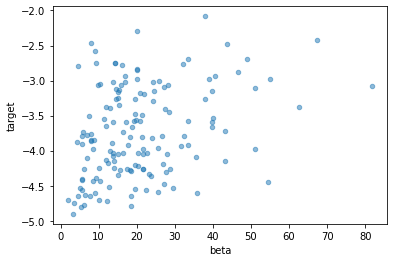

In [12]:
df_final.plot(kind="scatter", x="beta", y="target", alpha=1/2)

If we start using this model for predictions, we need to split the dataset. For now we are still exploring so we use all the data for analysis. The feature columns are all the columns added to the right of our dataset with estimations.

In [13]:
from sklearn.model_selection import train_test_split

featcols = len(df_prog.columns)
features = df_final.columns[featcols:]

#x_trn, x_tst, y_trn, y_tst = train_test_split(df_final[features], df_final['mcpop'])

x_trn = df_final[features]
y_trn = df_final['target']

Create the XGBoost data structure for training and check parameters to prevent overfitting on this small dataset. Then check the error rate between the test and train data used internally by XGBoost. If the test error rate is much higher, we are overfitting.

[0]	train-rmse:3.87021+0.02131	test-rmse:3.86468+0.21079
[10]	train-rmse:1.46787+0.01003	test-rmse:1.46575+0.19529
[20]	train-rmse:0.67973+0.00433	test-rmse:0.72172+0.17205
[30]	train-rmse:0.46034+0.00634	test-rmse:0.55650+0.14168
[40]	train-rmse:0.40998+0.00806	test-rmse:0.53225+0.13365
[50]	train-rmse:0.39654+0.00637	test-rmse:0.52658+0.13020
[60]	train-rmse:0.38920+0.00907	test-rmse:0.52421+0.12942
[70]	train-rmse:0.38211+0.00936	test-rmse:0.52623+0.12973
[80]	train-rmse:0.37704+0.00951	test-rmse:0.52807+0.13011
[90]	train-rmse:0.37334+0.00970	test-rmse:0.53125+0.12750
[99]	train-rmse:0.37021+0.00958	test-rmse:0.52869+0.12738


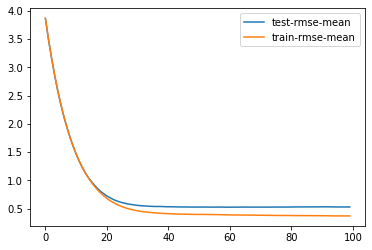

In [14]:
import xgboost as xgb

dtrn = xgb.DMatrix(x_trn, label=y_trn)
#dtst = xgb.DMatrix(x_tst)

params = {
    #'objective':'reg:squarederror',
    'eta':1/10,
    'gamma':1,
    #'min_child_weight':10,
    #'tree_method':'hist',
    #'seed':0,
    #'max_depth':3,
    'colsample_bytree':0.7,
    'subsample':0.7,
}

hist = xgb.cv(params, dtrn, nfold=10, as_pandas=True, num_boost_round=100, verbose_eval=10, early_stopping_rounds=1000, show_stdv=True, seed=0)
hist.plot(y=["test-rmse-mean", "train-rmse-mean"])

Train the model using the parameters found above and show the feature importance. Note that this can be both a positive and negative influence.

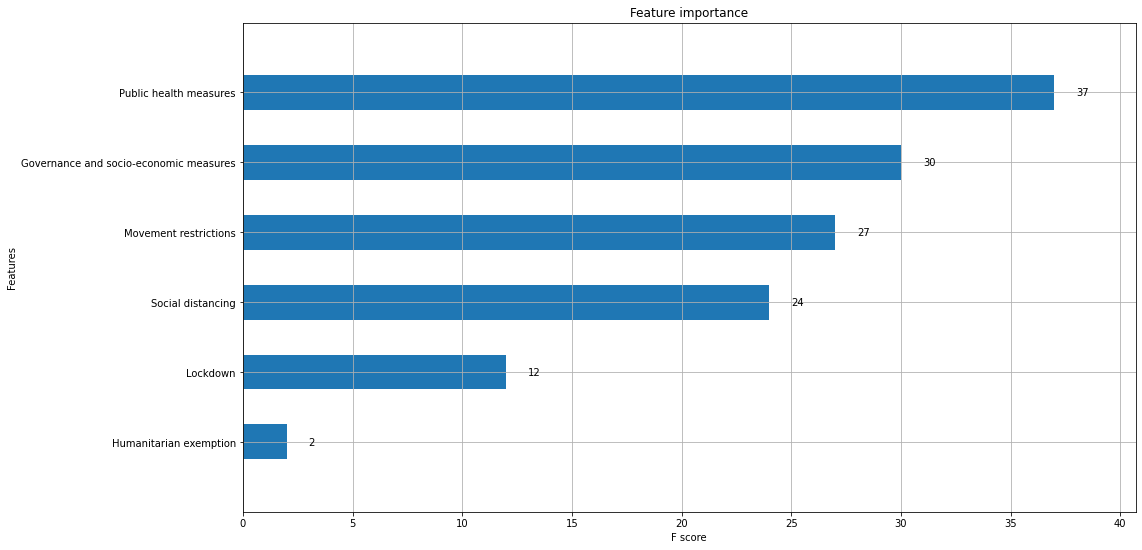

In [15]:
bst = xgb.train(params, dtrn, num_boost_round=100, verbose_eval=1)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

xgb.plot_importance(bst, ax=ax, height=1/2)

The actual XGBoost model is an ensemble of decision trees that can be hard to interpret. SHAP is an analysis library that shows the influence of factors based on this model. First we choose a country and see how the estimate relates to measures.

In [21]:
country = 'TG'

rownum = df_final[df_final['iso2'] == country].index[0]

import shap

shap.initjs()

explainer = shap.TreeExplainer(bst, x_trn)
shap_values = explainer.shap_values(x_trn)

shap.force_plot(explainer.expected_value, shap_values[rownum], x_trn.loc[rownum])

When we take all these plots, rotate and stack them we get a global view of the model.

In [17]:
shap.force_plot(explainer.expected_value, shap_values, x_trn)

Looking at individual measures we can visualize their impact on model output.

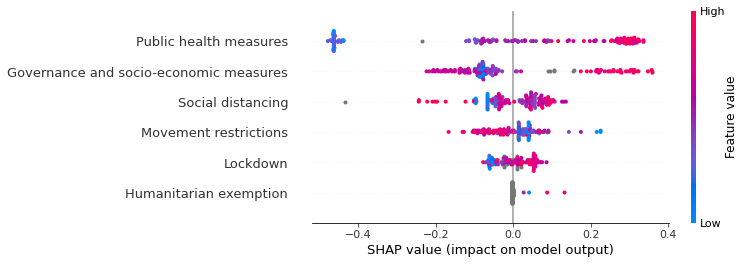

In [18]:
shap.summary_plot(shap_values, x_trn)

Finally, a similar plot to the importance plot above shows the explanatory value of measures.

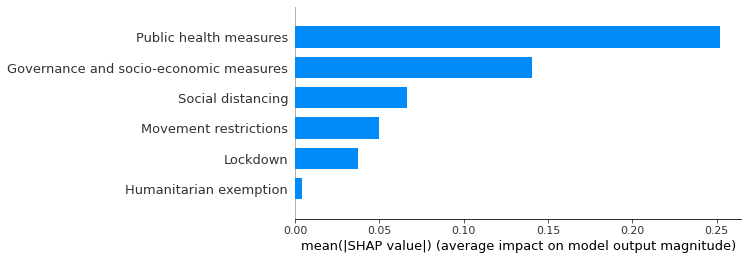

In [19]:
shap.summary_plot(shap_values, x_trn, plot_type="bar")

Keep exploring! Stay home, wash your hands, keep your distance.